<a href="https://colab.research.google.com/github/adeoyeadeola/diabetes-predication-/blob/main/scikit_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column (this is what we're trying to predict)
df['target'] = data.target

# Show the first 5 rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.describe

<bound method NDFrame.describe of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]>

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


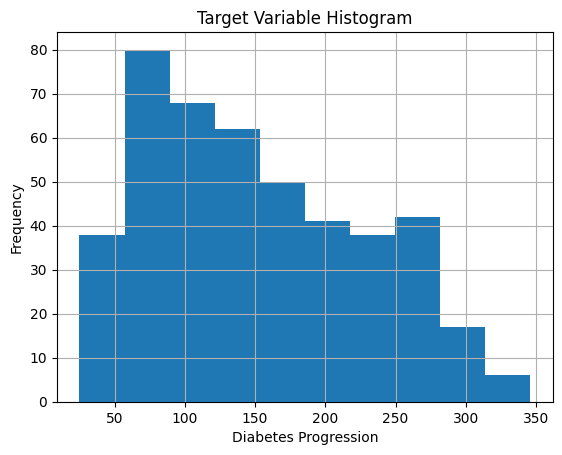

In [ ]:
import matplotlib.pyplot as plt
df['target'].hist()
plt.title('Target Variable Histogram')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']               # Target (the 'target' column)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R² score (how well the model fits the data)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-8-57785459dbf4>, line 9)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R² score (how well the model fits the data)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-9-635a9bec0c6f>, line 9)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R² score (how well the model fits the data)
r2 = r2_score(y_test, y_pred)
print("R2 Score:",r2)

Mean Squared Error: 2900.193628493482
R2 Score: 0.4526027629719195


In [11]:
!pip install shap

In [12]:
import shap

# Initialize the JavaScript visualizer
shap.initjs()

# Create an explainer for your model
explainer = shap.Explainer(model, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_val

SyntaxError: incomplete input (<ipython-input-12-dcd90b7a03d1>, line 13)

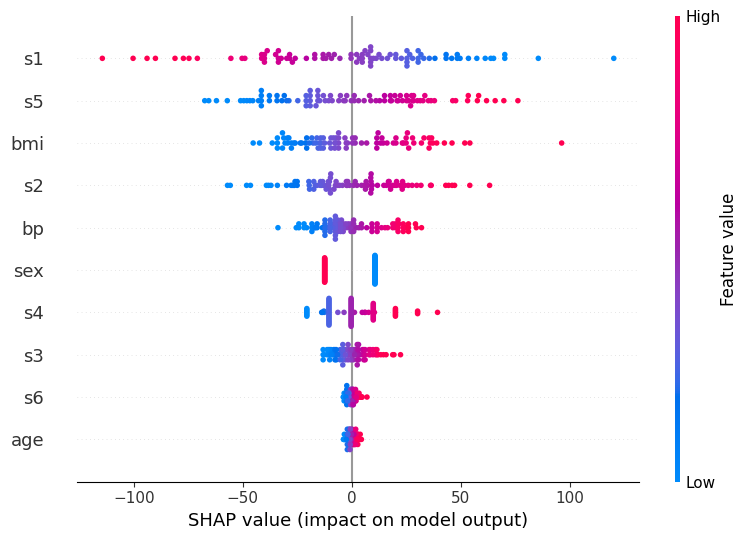

In [13]:
import shap

# Initialize the JavaScript visualizer
shap.initjs()

# Create an explainer for your model
explainer = shap.Explainer(model, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values,X_test)